In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = datasets.load_iris()

In [3]:
X = df.data
y = df.target
X_nor = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0)
y_one_hot = np.zeros((y.size, y.max() + 1))
y_one_hot[np.arange(y.size), y] = 1

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_nor, y_one_hot, test_size = 0.33)

In [5]:
print('X_train.shape ', X_train.shape)
print('y_train.shape ', y_train.shape)
print('X_test.shape ', X_test.shape)
print('y_test.shape ', y_test.shape)

X_train.shape  (100, 4)
y_train.shape  (100, 3)
X_test.shape  (50, 4)
y_test.shape  (50, 3)


In [6]:
flower_names = df.target_names
dim = ['Chiều dài đài hoa', 'Chiều rộng đài hoa', 'Chiều dài cánh hoa', 'Chiều rộng cánh hoa']
print("Flower names: ", flower_names)

Flower names:  ['setosa' 'versicolor' 'virginica']


In [7]:
def plot(X_train, y_train, dim1, dim2, title):
    y = np.argmax(y_train, axis=1)
    idx = np.unique(y)
    colors = ['purple', 'green', 'yellow']
    for i, label in enumerate(flower_names):
        plt.scatter(X_train[y == i, dim1], X_train[y == i, dim2], color=colors[i] , label = label)
    plt.xlabel(dim[dim1])
    plt.ylabel(dim[dim2])
    plt.title(title)
    plt.grid()
    plt.legend()
    plt.show()

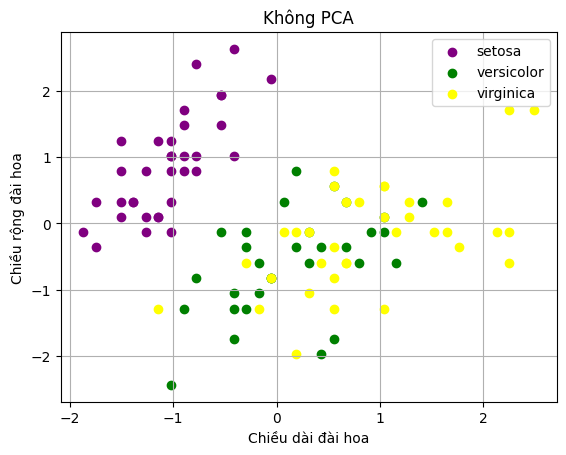

In [8]:
plot(X_train, y_train, 0, 1, 'Không PCA')

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [10]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [11]:
def loss_fn(y_pred, y):
    m = len(y)
    # loss = (-1/m)*(np.sum(y*np.log(y_pred) + (1-y)*(np.log(1-y_pred))))
    loss = - (1 / m) * np.sum(y * np.log(y_pred + 1e-9))
    return loss

In [12]:
def acc(y_pred, y_true):
    y_pred = np.argmax(y_pred, axis = 1)
    y_true = np.argmax(y_true, axis = 1)
    accuracy = np.mean(y_pred == y_true) * 100
    return accuracy

In [13]:
loss_records = []
epoch_records = []
def gradient_descend(X_train, y_train, w, learning_rate = 0.001, epochs = 1000, loss_record = [], epoch_record = []):
    for epoch in range(epochs):
        m = len(y_train)
        y_pred = softmax(np.dot(X_train, w))
        loss = loss_fn(y_pred, y_train)
        dw = (1/m)*(np.dot(X_train.T, (y_pred - y_train)))
        w -= learning_rate * dw
        accuracy = acc(y_pred, y_train)
        if epoch % 500 == 0:
            print(f'Epoch {epoch}, Loss: {loss}, Accuracy: {accuracy}')
        loss_record.append(loss)
        epoch_record.append(epoch)
    return w

In [14]:
w = np.zeros((4, 3))
w_lg = gradient_descend(X_train, y_train, w, 0.001, 5001, loss_records, epoch_records)

Epoch 0, Loss: 1.0986122856681098, Accuracy: 34.0
Epoch 500, Loss: 0.7727248358428292, Accuracy: 81.0
Epoch 1000, Loss: 0.6364293036732863, Accuracy: 82.0
Epoch 1500, Loss: 0.5665051837863017, Accuracy: 82.0
Epoch 2000, Loss: 0.5245338474390425, Accuracy: 81.0
Epoch 2500, Loss: 0.4965492353156951, Accuracy: 81.0
Epoch 3000, Loss: 0.4764895116724574, Accuracy: 81.0
Epoch 3500, Loss: 0.4613384420550062, Accuracy: 81.0
Epoch 4000, Loss: 0.44943516509120884, Accuracy: 81.0
Epoch 4500, Loss: 0.4397923454737371, Accuracy: 81.0
Epoch 5000, Loss: 0.4317870597665673, Accuracy: 82.0


In [15]:
def accuracy_test_set(X_test, w_lg):
    y_pred = np.dot(X_test, w_lg)
    y_pred = y_pred.argmax(axis = 1)
    y_true = np.argmax(y_test, axis = 1)
    accuracy = np.mean(y_pred == y_true) * 100
    print(f"Accuracy on test set: {accuracy}%")
accuracy_test_set(X_test, w_lg)

Accuracy on test set: 80.0%


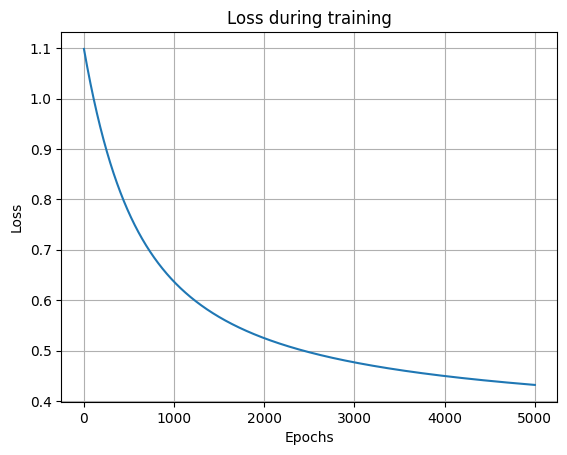

In [16]:
def plot_loss(epoch_record, loss_record):
    plt.plot(epoch_record, loss_record)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss during training')
    plt.grid(True)
    plt.show()
plot_loss(epoch_records, loss_records)

# Sử dụng PCA

In [17]:
def center_X(X):
    mean = np.mean(X, axis = 0)
    X = X - mean
    return X

In [18]:
def PCA(X_train, n_compos=2):
    m = X_train.shape[0]
    mean = np.mean(X_train, axis = 0)
    center = center_X(X_train)
    cov_matrix = np.cov(X.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    # Ở đây vector riêng được trả về dưới dạng là cột, nên là phải transpose lại ( dễ tính toán )
    eigenvectors = eigenvectors.T
    idxs = np.argsort(eigenvalues)
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]
    return np.dot(center, eigenvectors[0:n_compos].T)

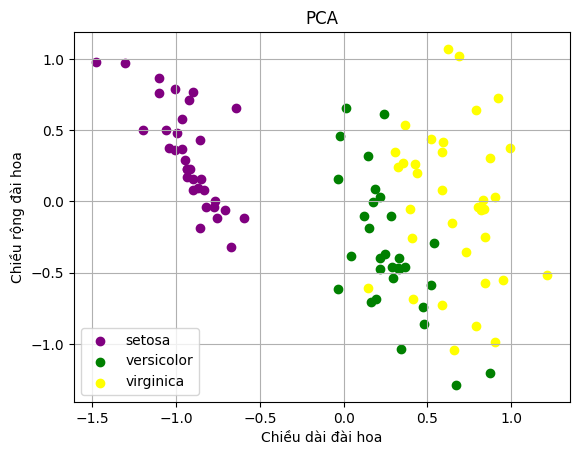

In [19]:
X_train_pca = PCA(X_train, 4)
plot(X_train_pca, y_train, 0, 1, 'PCA')

## Sử dụng dữ liệu mới X_pca để train

In [20]:
def run_pca(X_train, X_test, learning_rate = 0.001, epochs = 5001):
    for i in range(2, 5):
        print("i = ", i)
        loss_record = []
        epoch_record = []
        X_train_pca = PCA(X_train, i)
        X_test_pca = PCA(X_test, i)
        w_pca = np.zeros((X_train_pca.shape[1], y_train.shape[1]))
        w_lg_pca = gradient_descend(X_train_pca, y_train, w_pca, learning_rate, epochs, loss_record, epoch_record)
        accuracy_test_set(X_test_pca, w_lg_pca)
        plot_loss(epoch_record, loss_record)

i =  2
Epoch 0, Loss: 1.0986122856681098, Accuracy: 34.0
Epoch 500, Loss: 1.015262502480802, Accuracy: 80.0
Epoch 1000, Loss: 0.9462508722111994, Accuracy: 81.0
Epoch 1500, Loss: 0.8889083264072873, Accuracy: 82.0
Epoch 2000, Loss: 0.8409470280080238, Accuracy: 82.0
Epoch 2500, Loss: 0.8004931357404896, Accuracy: 82.0
Epoch 3000, Loss: 0.766054288048041, Accuracy: 82.0
Epoch 3500, Loss: 0.7364595107468163, Accuracy: 82.0
Epoch 4000, Loss: 0.7107951643925179, Accuracy: 82.0
Epoch 4500, Loss: 0.6883479976827539, Accuracy: 83.0
Epoch 5000, Loss: 0.6685586973692683, Accuracy: 83.0
Accuracy on test set: 82.0%


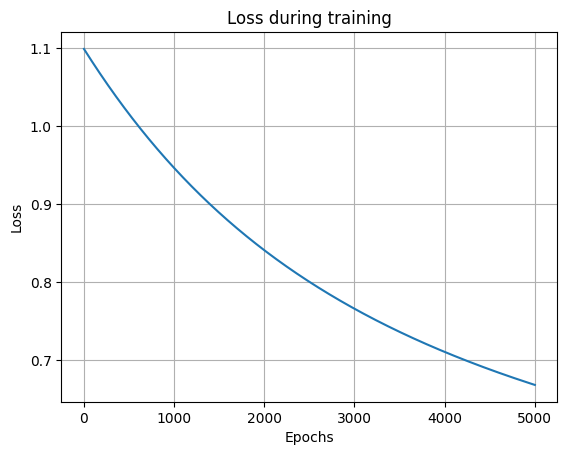

i =  3
Epoch 0, Loss: 1.0986122856681098, Accuracy: 34.0
Epoch 500, Loss: 1.004673884033529, Accuracy: 79.0
Epoch 1000, Loss: 0.929219113839265, Accuracy: 79.0
Epoch 1500, Loss: 0.8681098330178988, Accuracy: 80.0
Epoch 2000, Loss: 0.8180463845147758, Accuracy: 80.0
Epoch 2500, Loss: 0.7765114554809052, Accuracy: 80.0
Epoch 3000, Loss: 0.7416193718580257, Accuracy: 80.0
Epoch 3500, Loss: 0.7119611894719767, Accuracy: 80.0
Epoch 4000, Loss: 0.6864778747272721, Accuracy: 80.0
Epoch 4500, Loss: 0.6643653928539891, Accuracy: 80.0
Epoch 5000, Loss: 0.6450061888770636, Accuracy: 80.0
Accuracy on test set: 82.0%


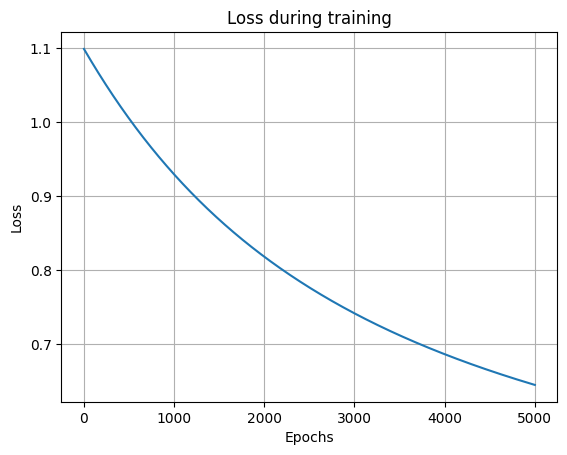

i =  4
Epoch 0, Loss: 1.0986122856681098, Accuracy: 34.0
Epoch 500, Loss: 0.7725720750631722, Accuracy: 81.0
Epoch 1000, Loss: 0.6356752271611444, Accuracy: 82.0
Epoch 1500, Loss: 0.5651766710677163, Accuracy: 82.0
Epoch 2000, Loss: 0.522729351458401, Accuracy: 82.0
Epoch 2500, Loss: 0.49435215379238834, Accuracy: 82.0
Epoch 3000, Loss: 0.4739644393259929, Accuracy: 82.0
Epoch 3500, Loss: 0.4585359439004922, Accuracy: 81.0
Epoch 4000, Loss: 0.4463956865239673, Accuracy: 82.0
Epoch 4500, Loss: 0.4365488335970058, Accuracy: 82.0
Epoch 5000, Loss: 0.4283667249426442, Accuracy: 82.0
Accuracy on test set: 78.0%


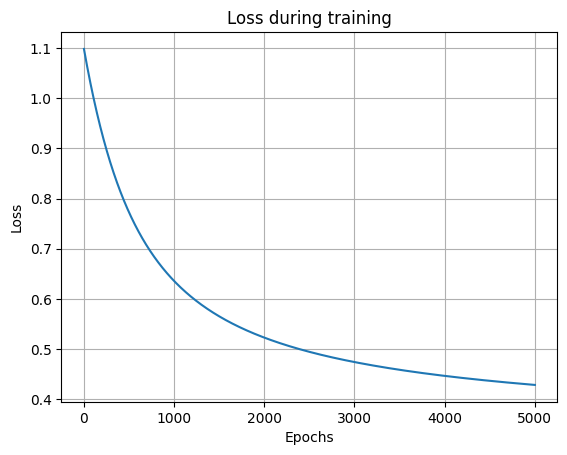

In [21]:
run_pca(X_train, X_test, 0.001, 5001)

# Nhận Xét

Theo đồ thị loss-epochs thì khi n_components (Chiều dữ liệu sau khi giảm) càng cao thì loss giảm mạnh, nhưng accuracy ở test_set không cao
--> Hiện tượng overfitting.
Với i = 2, chiều dữ liệu sau khi giảm = 2 thì accuracy ở test set đạt cao nhất